In [ ]:
import pandas as pd

df= pd.read_csv("/content/FinalData - Copy2 total(1).csv", encoding='windows-1252')
df.drop('remove', axis=1, inplace=True)
df = df[['date', 'clean_tweets', 'labels']]
df.rename(columns={"clean_tweets": "tweet"}, inplace=True)
df.head()

,date,tweet,labels
0,5/31/2022 6:57,jumat dan senin itu jadwal tetap aku kuliah ta...,1
1,5/31/2022 6:45,prnmaaaa banjarbase tapi ku tiap bulan tatap m...,1
2,5/31/2022 6:44,bayujoo nyapu dalem rumah gatau kenapa maleeee...,2
3,5/31/2022 6:21,alhamdulillah sebentar lagi si kecil keponakan...,0
4,5/31/2022 5:29,ohmybeautybank gue pakai kemeja kakak gue kare...,1


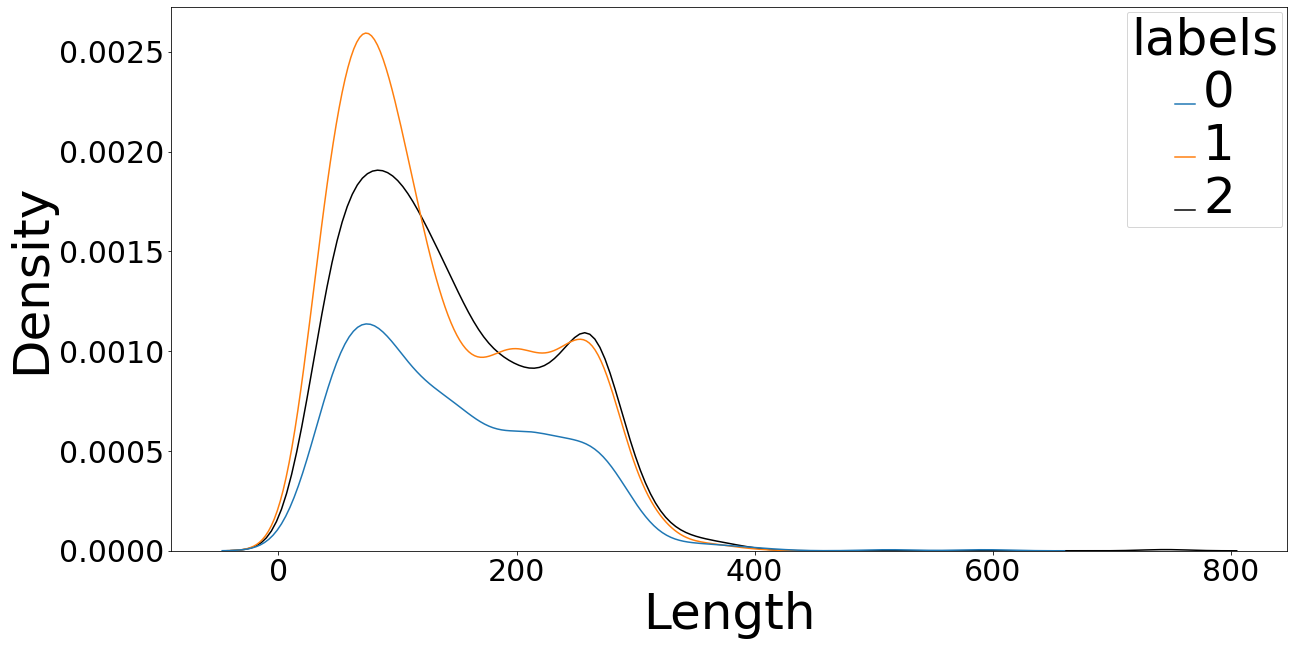

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
df2 = df.copy()
df2['length'] = [len(x) for x in df2['tweet']]
ax = sns.kdeplot(data=df2, x='length', hue='labels', palette=["C0", "C1", "k"])
plt.setp(ax.get_legend().get_texts(), fontsize=50)
plt.setp(ax.get_legend().get_title(), fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Length', fontsize=50)
plt.ylabel('Density', fontsize=50)
plt.show()

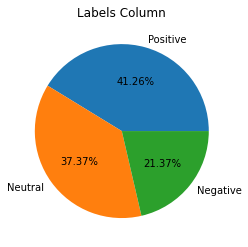

In [ ]:
import numpy as np

def fmt_pct(val):
  a  = np.round(val, 2)
  return f'{a}%'

counts = df['labels'].value_counts()

plt.pie(list(counts), labels=['Positive', 'Neutral', 'Negative'], autopct=fmt_pct)
plt.title('Labels Column')
plt.show()

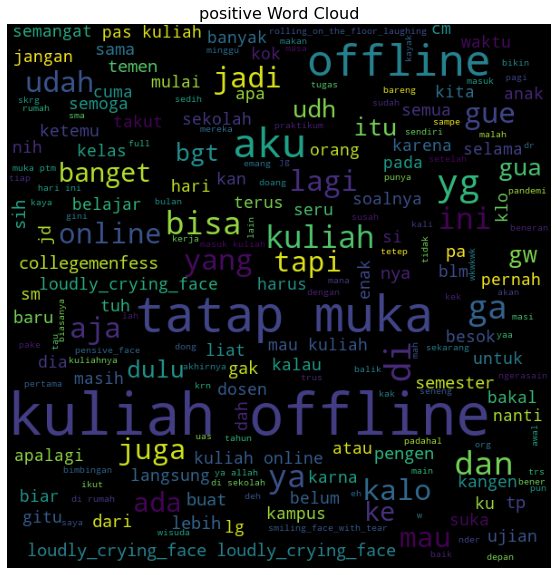

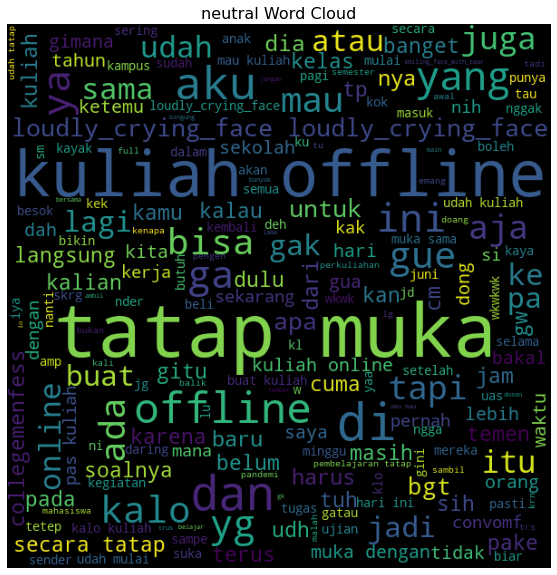

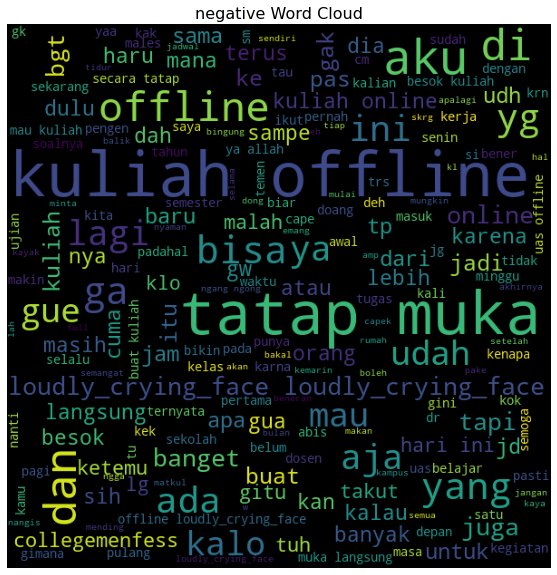

In [ ]:
from wordcloud import WordCloud

def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

classes = ['positive', 'neutral', 'negative']
for i, x in enumerate(classes):
    text = ' '.join([sentence for sentence in df.loc[df['labels'] == i, 'tweet']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, x)

In [ ]:
df.dtypes

date      object
tweet     object
labels     int64
dtype: object

In [ ]:
df.index

In [ ]:
data = pd.DataFrame()

data['tweet'] = df.tweet

data['hour'] = pd.DatetimeIndex(df.date).hour
data['date'] = pd.DatetimeIndex(df.date).date
data['count'] = 1
data_filtered = data[['hour', 'date', 'count']]
data_filtered

,hour,date,count
0,6,2022-05-31,1
1,6,2022-05-31,1
2,6,2022-05-31,1
3,6,2022-05-31,1
4,5,2022-05-31,1
...,...,...,...
3289,15,2022-06-09,1
3290,23,2022-06-07,1
3291,22,2022-06-07,1
3292,1,2022-06-13,1


In [ ]:
data.date

0       2022-05-31
1       2022-05-31
2       2022-05-31
3       2022-05-31
4       2022-05-31
           ...    
3289    2022-06-09
3290    2022-06-07
3291    2022-06-07
3292    2022-06-13
3293    2022-06-06
Name: date, Length: 3294, dtype: object

In [ ]:
data[data.date == '2022-05-30']

,tweet,hour,date,count


In [ ]:
df_tweets_hourly = data_filtered.groupby(["hour"]).sum().reset_index()
df_tweets_hourly.head()

,hour,count
0,0,122
1,1,58
2,2,29
3,3,18
4,4,19


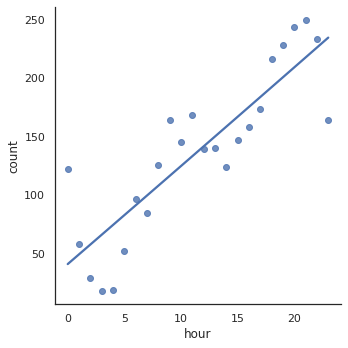

In [ ]:
sns.set(style="white")
sns.lmplot(x="hour", y="count",order=2, ci=None, data=df_tweets_hourly)
plt.show()

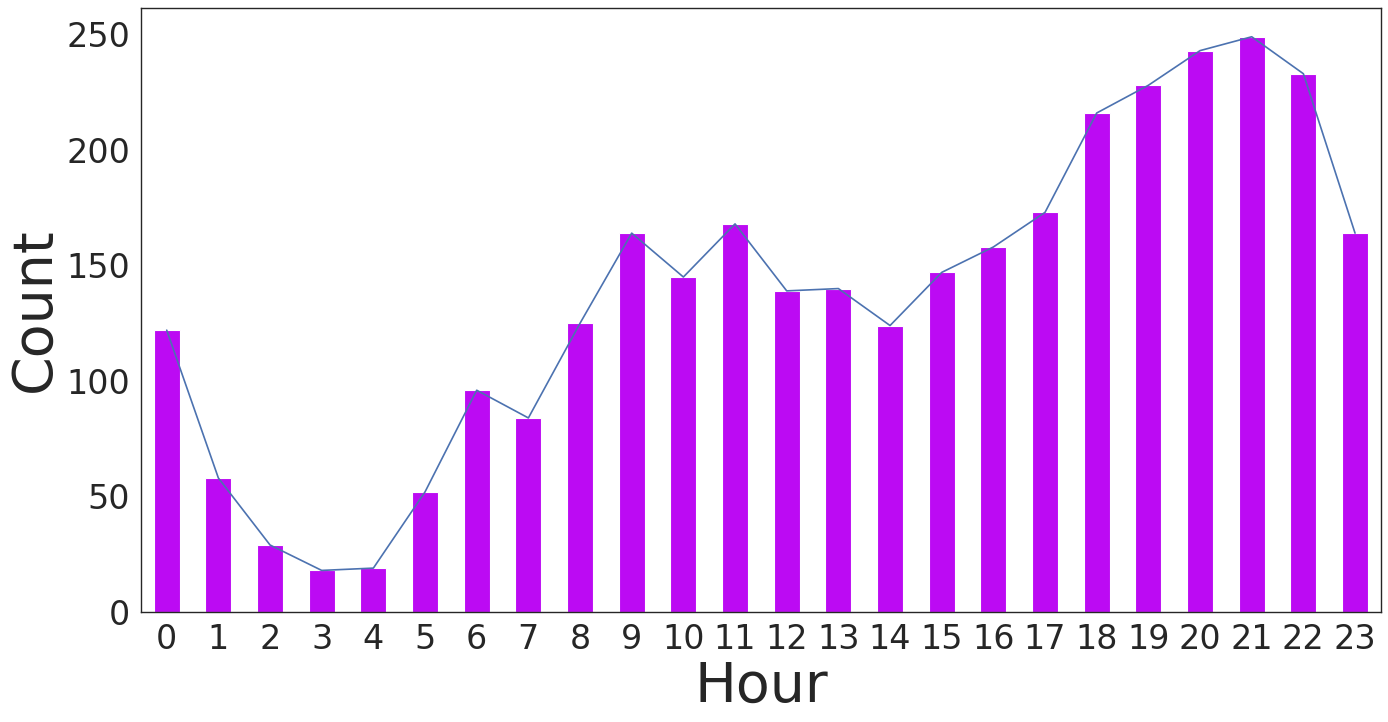

In [ ]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
df_tweets_hourly["count"].plot.bar(color='#BC0AF3')
df_tweets_hourly["count"].plot()
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Hour', fontsize=50)
plt.ylabel('Count', fontsize=50)
plt.show()

In [ ]:
df_tweets_day = data_filtered.groupby(["date"]).sum().reset_index()
df_tweets_day

,date,hour,count
0,2022-05-23,35,3
1,2022-05-24,93,5
2,2022-05-25,920,47
3,2022-05-26,1481,104
4,2022-05-27,1570,115
5,2022-05-28,963,65
6,2022-05-29,3063,175
7,2022-05-30,6252,455
8,2022-05-31,1530,154
9,2022-06-01,2504,140


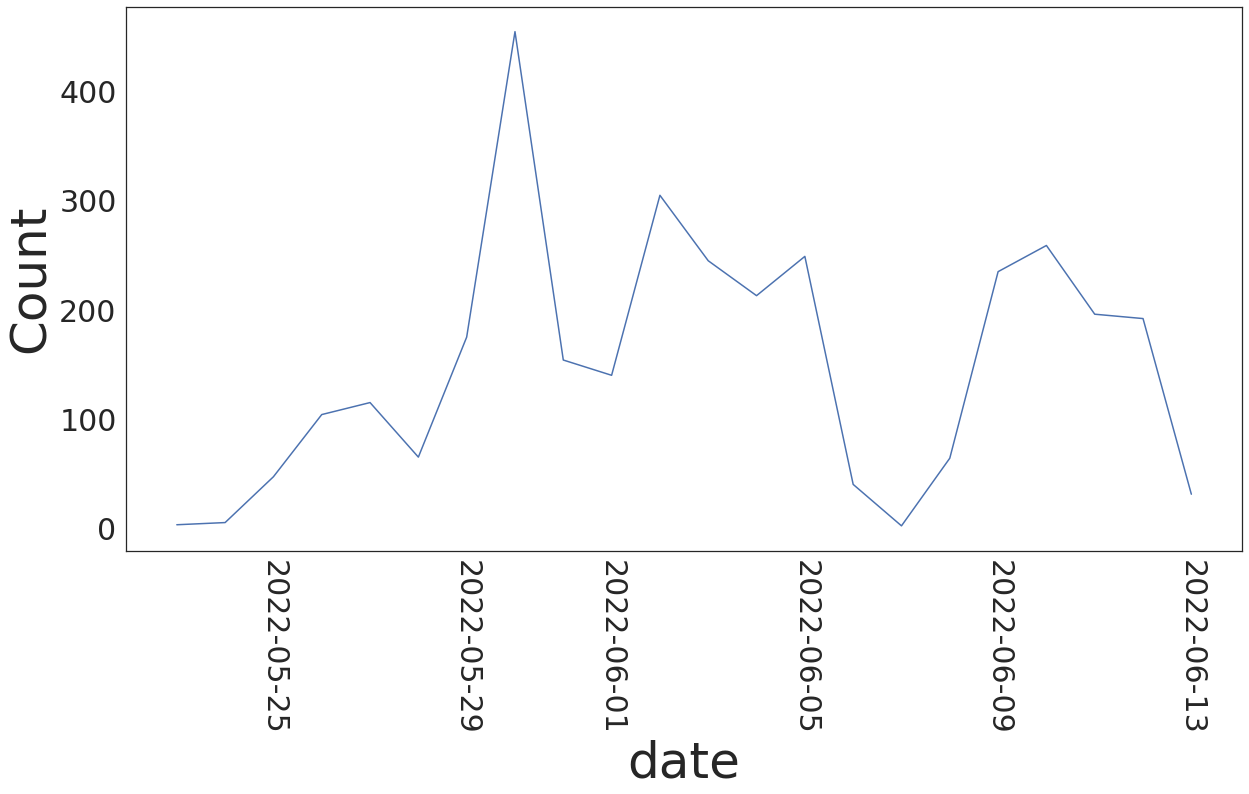

In [ ]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=270)
plt.plot(df_tweets_day.date, df_tweets_day['count'])
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('date', fontsize=50)
plt.ylabel('Count', fontsize=50)
plt.show()